# Car Price Prediction: Data Preprocessing / EDA
## Project Members: 
### 1.    Abhishek Manish Bedarkar | 50495186 | abedarka
### 2.    Sanket Milind Gadhave | 50495154 | sgadhave
### 3.    Milind Rajendra Kulkarni | 50495311 | milindra

In [10]:
# import all required libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from scipy import stats
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import scatter_matrix
from joblib import dump

In [11]:
# Read csv file and render top 10 rows
df = pd.read_csv("car_price_prediction.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,45654403,44731507,45774419,45769185,45809263,45802912,45656768,45816158,45641395,45756839
Price,13328,16621,8467,3607,11726,39493,1803,549,1098,26657
Levy,1399,1018,-,862,446,891,761,751,394,-
Manufacturer,LEXUS,CHEVROLET,HONDA,FORD,HONDA,HYUNDAI,TOYOTA,HYUNDAI,TOYOTA,LEXUS
Model,RX 450,Equinox,FIT,Escape,FIT,Santa FE,Prius,Sonata,Camry,RX 350
Prod. year,2010,2011,2006,2011,2014,2016,2010,2013,2014,2007
Category,Jeep,Jeep,Hatchback,Jeep,Hatchback,Jeep,Hatchback,Sedan,Sedan,Jeep
Leather interior,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Fuel type,Hybrid,Petrol,Petrol,Hybrid,Petrol,Diesel,Hybrid,Petrol,Hybrid,Petrol
Engine volume,3.5,3,1.3,2.5,1.3,2,1.8,2.4,2.5,3.5


In [12]:
# List of features in dataset
df.columns.to_list()

['ID',
 'Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags']

In [13]:
# Print summary of dataset and have a look at central tendancy
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


# Data Preprocessing
## 1. Column Renaming

In [14]:
# Renaming dataset attributes for better understanding
df.rename(columns={'Prod. year': 'Prod_year'}, inplace=True)
df.rename(columns={'Leather interior': 'Leather_interior'}, inplace=True)
df.rename(columns={'Fuel type': 'Fuel_type'}, inplace=True)
df.rename(columns={'Engine volume': 'Engine_volume'}, inplace=True)
df.rename(columns={'Gear box type': 'Gear_box_type'}, inplace=True)
df.rename(columns={'Drive wheels': 'Drive_wheels'}, inplace=True)

## 2. Removing Duplicates

In [15]:
# Dimention of dataset before removing duplicates 
df.shape

(19237, 18)

In [16]:
# Count the number of duplicates in dataset
df.duplicated().sum()

313

In [17]:
# Drop duplicate rows from dataset
df = df.drop_duplicates()

In [18]:
# Dimention of dataset after removing duplicates
df.shape

(18924, 18)

## 3. Handling inconsistent Mileage values

In [19]:
# remove km from mileage

df["Mileage"] = df["Mileage"].str.replace(' km', '')  # Replace spaces with underscores

df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## 4. Handle incorrect format of Levy

In [20]:
# Replace '-' and '' with '0'
df["Levy"] = df["Levy"].str.replace("-", '')
df["Levy"] = df["Levy"].str.replace("", '0')


## 5. Feature Engineering

In [21]:
# Create new enriched column 'With_Turbo' and remove 'Turbo' from eng
df['With_Turbo'] = df['Engine_volume'].str.contains(' Turbo', case=False).astype(int)
df["Engine_volume"] = df["Engine_volume"].str.replace(' Turbo', '')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
0,45654403,13328,010309090,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,010001080,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,0806020,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,0404060,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


## 6. Handling Null Values

In [22]:
# Check for any missing values
df.isnull().sum()
# Since there are no missing values we don't have to worry about filling 
# missing values

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather_interior    0
Fuel_type           0
Engine_volume       0
Mileage             0
Cylinders           0
Gear_box_type       0
Drive_wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
With_Turbo          0
dtype: int64

## 7. Datatype conversion

In [23]:
# Converting datatypes of attributes 
df['Manufacturer'] = df['Manufacturer'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Leather_interior'] = df['Leather_interior'].astype('category')
df['Fuel_type'] = df['Fuel_type'].astype('category')
df['Gear_box_type'] = df['Gear_box_type'].astype('category')
df['Drive_wheels'] = df['Drive_wheels'].astype('category')
df['Doors'] = df['Doors'].astype('category')
df['Wheel'] = df['Wheel'].astype('category')
df['Color'] = df['Color'].astype('category')
df['Model'] = df['Model'].astype('category')
df["Mileage"] = df["Mileage"].astype(str).astype(int)
df["Levy"] = df["Levy"].astype(str).astype(float)
df["Engine_volume"] = df["Engine_volume"].astype(str).astype(float)

In [24]:
# To render the change in datatype conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                18924 non-null  int64   
 1   Price             18924 non-null  int64   
 2   Levy              18924 non-null  float64 
 3   Manufacturer      18924 non-null  category
 4   Model             18924 non-null  category
 5   Prod_year         18924 non-null  int64   
 6   Category          18924 non-null  category
 7   Leather_interior  18924 non-null  category
 8   Fuel_type         18924 non-null  category
 9   Engine_volume     18924 non-null  float64 
 10  Mileage           18924 non-null  int32   
 11  Cylinders         18924 non-null  float64 
 12  Gear_box_type     18924 non-null  category
 13  Drive_wheels      18924 non-null  category
 14  Doors             18924 non-null  category
 15  Wheel             18924 non-null  category
 16  Color             18924 non

## 8. Drop irrelevant columns

In [25]:
# Drop ID column as it wont contribute in prediction
df.drop(columns='ID', inplace=True)
df.head(5)

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
0,13328,10309090.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,10001080.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,806020.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,404060.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


## 9. Outlier Removal

In [26]:
# Display the entry with the maximum price

display(df[df.Price == df.Price.max()])
display(df[df.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
16983,26307500,0.0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,0


,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
7,549,705010.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12,0
10,941,10005030.0,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467,6.0,Automatic,Rear,04-May,Left wheel,White,12,0
15,549,10007090.0,TOYOTA,CHR,2018,Jeep,Yes,Petrol,2.0,74146,4.0,Automatic,Front,04-May,Left wheel,White,12,0
18,549,20308060.0,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059,6.0,Automatic,Rear,04-May,Left wheel,Blue,12,0
19,941,10805000.0,LEXUS,RX 400,2008,Jeep,Yes,Hybrid,3.5,364523,6.0,Automatic,4x4,04-May,Left wheel,Black,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,0.0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,04-May,Right-hand drive,Green,9,0
19228,706,10805000.0,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874,6.0,Automatic,Rear,04-May,Left wheel,Black,12,0
19229,50,0.0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04-May,Left wheel,Silver,6,0
19230,470,604050.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0


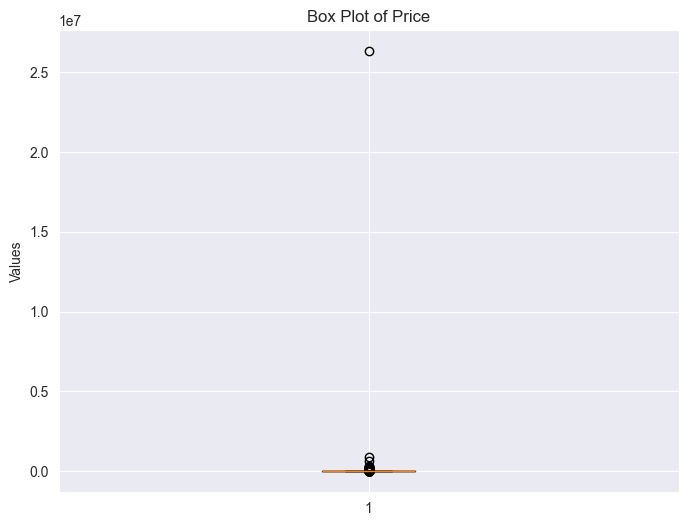

In [27]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

#create a box plot for the 'Price' column
plt.boxplot(df['Price'])
plt.title(f'Box Plot of Price')
plt.ylabel('Values')
plt.show()

In [28]:
# Display the entry with the maximum mileage in the dataset
display(df[df.Mileage == df.Mileage.max()])
display(df[df.Mileage < 1000])

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
2278,6899,0.0,VOLKSWAGEN,Golf,1999,Sedan,No,Petrol,1.6,2147483647,4.0,Manual,Front,04-May,Left wheel,Black,4,0
6157,5959,0.0,MERCEDES-BENZ,C 180,1995,Sedan,No,CNG,1.8,2147483647,4.0,Manual,Rear,04-May,Left wheel,Blue,5,0
11901,10036,0.0,SUBARU,Forester,2005,Jeep,No,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,04-May,Right-hand drive,White,12,0
12734,2200,0.0,UAZ,31514,1968,Jeep,Yes,CNG,2.4,2147483647,4.0,Manual,4x4,04-May,Left wheel,Black,10,0
15347,3,0.0,BMW,525,1995,Sedan,No,Petrol,2.8,2147483647,6.0,Manual,Rear,04-May,Left wheel,Black,3,0
15393,15681,0.0,TOYOTA,Prius,2008,Sedan,No,Petrol,2.0,2147483647,4.0,Automatic,Front,04-May,Left wheel,Blue,0,0
19167,18817,10909050.0,FORD,Transit,2003,Microbus,No,Diesel,2.4,2147483647,4.0,Manual,Front,02-Mar,Left wheel,White,2,1


,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
11,8781,0.0,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0,0
24,4704,0.0,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0,4.0,Automatic,Front,04-May,Left wheel,Green,4,0
26,549,20405050.0,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0,8.0,Automatic,4x4,04-May,Left wheel,White,0,0
83,8154,0.0,HONDA,Cr-v,1998,Jeep,No,Petrol,2.0,0,4.0,Automatic,4x4,04-May,Right-hand drive,White,2,0
97,4234,0.0,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,02-Mar,Left wheel,Blue,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,0.0,BMW,320,1994,Sedan,Yes,Petrol,2.0,0,6.0,Manual,Rear,04-May,Left wheel,Green,2,0
19088,2200,0.0,PEUGEOT,406,2001,Sedan,No,Petrol,2.0,0,4.0,Manual,Front,04-May,Left wheel,White,2,0
19103,30,0.0,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0,4.0,Automatic,Front,04-May,Right-hand drive,Black,4,0
19218,30,0.0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,04-May,Right-hand drive,Green,9,0


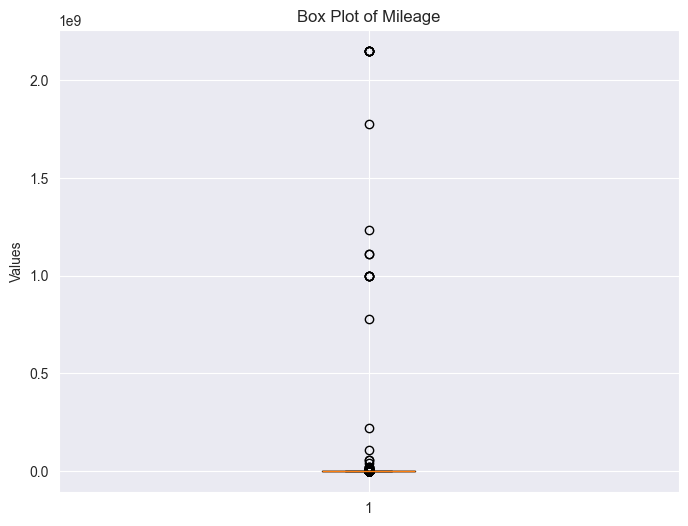

In [29]:
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(8, 6))  

# Create a box plot for Mileage
plt.boxplot(df['Mileage'])
plt.title(f'Box Plot of Mileage')
plt.ylabel('Values')
plt.show()

In [30]:
# Function to detect outliers using interquartile method.

def detect_outliers(df,features,thold):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [31]:
# Features to perform outliers check
features = ['Price', 'Levy', 'Mileage']

# Get index of outliers
outliers = detect_outliers(df,features, 1.5)

# Remove outliers
df = df.drop(df.loc[outliers].index,axis=0)
df

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,806020.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,404060.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0
5,39493,809010.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,0
6,1803,706010.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,604050.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,803010.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,803060.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0


In [32]:
display(df[df.Price == df.Price.max()])
display(df[df.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
12252,47120,609040.0,JAGUAR,XF,2014,Sedan,Yes,Diesel,2.2,122172,4.0,Automatic,Front,04-May,Left wheel,Black,4,0


,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags,With_Turbo
7,549,705010.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12,0
27,30,0.0,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,169000,4.0,Automatic,Front,04-May,Left wheel,White,8,0
58,392,901090.0,BMW,535,2012,Sedan,Yes,Petrol,3.0,204318,6.0,Automatic,Rear,04-May,Left wheel,Black,12,0
68,314,707090.0,TOYOTA,Camry,2013,Sedan,Yes,Hybrid,2.5,225510,4.0,Automatic,Front,04-May,Left wheel,White,12,0
92,549,708010.0,SUBARU,Forester,2012,Jeep,Yes,Petrol,2.5,148213,4.0,Automatic,4x4,04-May,Left wheel,Blue,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,470,803010.0,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,25635,4.0,Automatic,Front,04-May,Left wheel,Black,12,0
19218,30,0.0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,04-May,Right-hand drive,Green,9,0
19229,50,0.0,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04-May,Left wheel,Silver,6,0
19230,470,604050.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0


In [33]:
df.shape

(13605, 18)

## 10. Encoding

In [34]:
# Peform endcoding on Doors, Wheel, Drive_wheels, Gear_box_type and
# Leather_interior

# Replace values in the 'Doors' column
# 04-May' is replaced with 1, '02-Mar' is replaced with 2, and '>5'
# is replaced with 3
df['Doors'].replace(['04-May', '02-Mar',">5"],
                        [1, 2, 3], inplace=True)

# Replace values in the 'Wheel' column
# 'Left wheel' is replaced with 1, 'Right-hand drive' is replaced with 2
df['Wheel'].replace(['Left wheel', 'Right-hand drive'],
                        [1, 2], inplace=True)

# Replace values in the 'Drive_wheels' column 'Front' is replaced with 1,
# '4x4' is replaced with 2, 'Rear' is replaced with 3
df['Drive_wheels'].replace(['Front', '4x4',"Rear"],
                        [1, 2, 3], inplace=True)

# Replace values in the 'Gear_box_type' column 'Automatic' is replaced with
# 1, 'Tiptronic' is replaced with 2, 'Manual' is replaced with 3, 'Variator'
# is replaced with 4

df['Gear_box_type'].replace(['Automatic', 'Tiptronic',"Manual","Variator"],
                        [1, 2, 3 , 4], inplace=True)


# Replace values in the 'Leather_interior' column 'Yes' is replaced with 1,
# 'No' is replaced with 2

df['Leather_interior'].replace(['Yes', 'No'],
                        [1, 2], inplace=True)

encoded_cols=['Doors', 'Wheel', 'Drive_wheels', 'Gear_box_type', 'Leather_interior' ]
df[encoded_cols].head(5)

,Doors,Wheel,Drive_wheels,Gear_box_type,Leather_interior
2,1,2,1,4,2
3,1,1,2,1,1
4,1,1,1,1,1
5,1,1,1,1,1
6,1,1,1,1,1


## 11. Scaling

In [35]:
# Create instance of  MinMaxScaler
scale = MinMaxScaler()

# Reshape the 'Levy' and 'Mileage' columns to be compatible with the scaler
X2 = df["Levy"].values.reshape(-1, 1)
X = df["Mileage"].values.reshape(-1, 1)

# Use Min-Max scaling to scale the 'Mileage' and 'Levy' columns 
scaledX = scale.fit_transform(X)
scaledX2 = scale.fit_transform(X2)

# Scaled values for 'Mileage' and 'Levy'
print(scaledX)
print(scaledX2)

# Update the 'Mileage' and 'Levy' columns in the DataFrame with the scaled values
df["Mileage"] = scaledX
df["Levy"] = scaledX2


df[['Levy','Mileage']].head(5)

[[0.54495913]
 [0.46039782]
 [0.25041144]
 ...
 [0.44032698]
 [0.31707084]
 [0.50932698]]
[[0.        ]
 [0.88664239]
 [0.44447622]
 ...
 [0.88333132]
 [0.88338632]
 [0.77555084]]


,Levy,Mileage
2,0.000000,0.544959
3,0.886642,0.460398
4,0.444476,0.250411
5,0.889931,0.438504
6,0.776629,0.705474


In [36]:
# print the columns
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'With_Turbo'],
      dtype='object')

In [37]:
df.head(10).T

,2,3,4,5,6,7,9,11,12,16
Price,8467,3607,11726,39493,1803,549,26657,8781,3000,7683
Levy,0.0,0.886642,0.444476,0.889931,0.776629,0.775529,0.0,0.0,0.0,0.88112
Manufacturer,HONDA,FORD,HONDA,HYUNDAI,TOYOTA,HYUNDAI,LEXUS,FORD,OPEL,HYUNDAI
Model,FIT,Escape,FIT,Santa FE,Prius,Sonata,RX 350,Transit,Vectra,Elantra
Prod_year,2006,2011,2014,2016,2010,2013,2007,1999,1997,2016
Category,Hatchback,Jeep,Hatchback,Jeep,Hatchback,Sedan,Jeep,Microbus,Goods wagon,Sedan
Leather_interior,2,1,1,1,1,1,1,2,2,1
Fuel_type,Petrol,Hybrid,Petrol,Diesel,Hybrid,Petrol,Petrol,CNG,CNG,Petrol
Engine_volume,1.3,2.5,1.3,2.0,1.8,2.4,3.5,4.0,1.6,1.8
Mileage,0.544959,0.460398,0.250411,0.438504,0.705474,0.588877,0.350136,0.0,0.953678,0.331989


In [38]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage',
       'Cylinders', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'With_Turbo'],
      dtype='object')

In [ ]:
# lets separate num attributes and categorical attributes from data
num_attribs = ['Levy','Prod_year', 'Engine_volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attribs = ['Manufacturer','Category', 'Leather_interior', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Wheel', 'Color', 'With_Turbo']

In [ ]:
# Create separate df for all
num_cars = df[num_attribs]
y = df['Price']
cat_cars = df[cat_attribs]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Initialize standar scaler object
scaler = StandardScaler()

# perform scalarization on numerical attributes
num_cars = scaler.fit_transform(num_cars)

In [ ]:
from sklearn.pipeline import Pipeline

# created pipeline for scalarization
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())])

In [ ]:
from sklearn.compose import ColumnTransformer

# created pipeline for one hot encoding to transform variables
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)  
])

cars_prepared = full_pipeline.fit_transform(df)
dump(full_pipeline, 'full_pipeline.joblib')

In [ ]:
cars_prepared.shape

In [ ]:
# perform train test split
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.20, random_state = 10)

In [ ]:
X_test.shape

In [ ]:
# 1. Linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

# predict values for X_test
predictions = reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

dump(reg, 'linear_regression_model.joblib')
#We are approximately 8.3k away from actual prices which is not bad

In [ ]:
mae = mean_absolute_error(y_test, predictions)
mae

In [ ]:
accuracy_ln = round(r2_score(y_test,predictions),3)*100
print("Accuracy by linear regression ",accuracy_ln)

In [ ]:
#2. Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Initialize decision tree regressor
tree_reg = DecisionTreeRegressor(random_state = 10)
tree_reg.fit(X_train, y_train)

In [ ]:

tree_predictions_train = tree_reg.predict(X_train)
tree_mse_train = mean_squared_error(y_train, tree_predictions_train)
tree_mse_train = np.sqrt(tree_mse_train)
print("Train rmse",tree_mse_train)

In [ ]:
# calculate and print test rmse
tree_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Test rmse",tree_rmse)

In [ ]:
# lets print tree rmse scores with cv as 5
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

In [ ]:
# Display accuracy for decision tree
accuracy_dt = round(r2_score(y_test,tree_predictions),3)*100
print("Accuracy by decision tree ",accuracy_dt)

In [ ]:
# Plotting the actual vs. predicted values
plt.scatter(y_test, tree_predictions, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs. Predicted Values')
plt.show()

In [ ]:
# 3. Random forest

In [ ]:
# Initialize object for random forest regressor
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=10)
forest_reg.fit(X_train, y_train)

In [ ]:
# calculate and print train rsme to check fit of data
forest_predictions_train = forest_reg.predict(X_train)
forest_mse_train = mean_squared_error(y_train, forest_predictions_train)
forest_mse_train = np.sqrt(forest_mse_train)
print("Train rmse for random forest : ",forest_mse_train)

In [ ]:
# calculate and print test rsme to check fit of data
forest_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_mse = np.sqrt(forest_mse)
print("Test rmse for random forest : ",forest_mse)

In [ ]:
# print rmse scores for random forest
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform grid search with estimators and max_features
param_grid = [ {'n_estimators': [100, 200], 'max_features': [35,33,31]},]

forest_reg = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# print best params
grid_search.best_params_

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = [i  for cat in cat_encoder.categories_ for i in cat]
attributes = num_attribs +  cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


In [ ]:
print(f"Shape: {X_test.shape}")

In [ ]:
# Calcualte and print test rmse based on best estimator

from joblib import dump

final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
dump(final_model, 'random_forest_model.joblib')
print("Test RMSE for random forest after grid search :",final_rmse)



In [ ]:
# calculate squared error with confidence as 95%
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

In [ ]:
# display accuracy for random forest
accuracy_rf = round(r2_score(y_test,final_predictions),3)*100
print("Accuracy by Random forest ",accuracy_rf)

In [ ]:
# 4. Ada boost regressor

# Initialize ada boost regressor
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
ada.fit(X_train, y_train)    

# Predict values using ada boost model
y_pred = ada.predict(X_test)

# Print accuracy
accuracy_ada = round(r2_score(y_test,y_pred),3)*100
print("Accuracy by ada boost ",accuracy_ada)

In [ ]:
# Residual plot for adaboost 
residuals = y_pred - y_test
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (AdaBoost)")
plt.show()

In [ ]:
# 5. K-Nearest Neighbors (KNN)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)
print("Accuracy by KNN",knn_accuracy)

In [ ]:
residuals = knn_pred - y_test
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (KNN)")
plt.show()

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.title('KNN Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [ ]:
# 6. Gradient Boosting (XGBoost)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
xgb_accuracy = xgb_reg.score(X_test, y_test)
print("Accuracy by XG boost :", xgb_accuracy)

In [ ]:
residuals = xgb_pred - y_test
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (XGBoost)")
plt.show()

In [ ]:
# Accuracy of all models:
print("Accuracy acheived by different models")
print("1. linear regression ",accuracy_ln)
print("2. decision tree ",accuracy_dt)
print("3. Random forest ",accuracy_rf)
print("4. ada boost ",accuracy_ada)
print("5. KNN",knn_accuracy*100)
print("6. XG boost :", xgb_accuracy*100)